# GRIP JUNE23 - The Sparks Foundation
 

# Task-4  Exploratory Data Analysis  - Terrorism 

 # Executed By - Vennapusa Shiva Divya

# Problem Statement: Perform Exploratory Data Analysis on "Global Terrorism"


# Objective : As a Security/defense analyst,Find out the hot zones of terrorism? 

# Step 1 - Import Necessary Libraries

In [185]:
#import librairies
import math
import warnings
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')


# Step 2 - Loading Dataset

In [186]:
terror=pd.read_csv('globalterrorismdb_0718dist.csv',encoding='latin1')

In [187]:
terror.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


There are 5 Rows and 135 Columns in the dataset

In [188]:
terror.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [189]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [190]:
# percentage of missing values in our dataset
missing_values = (((terror.isnull().sum()).sum())/terror.size)*100
missing_values


56.481718962414206

More than 50% values are Null.So,we need to remove Unnecessary  columns from the dataset



In [191]:
terror.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [192]:
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)


In [193]:
terror=terror[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [194]:
terror.head()


,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [195]:
terror.shape

(181691, 18)

In [196]:
terror.isnull().sum()


Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [197]:
terror.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

As we can see, 'Wounded' and 'Killed' Attributes have lots of Null values, we need to fill null values



In [198]:
terror.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [199]:
# Checking the distribution of columns
freqgraph = terror.select_dtypes(include = ['float','int'])
freqgraph

,Year,Month,Day,latitude,longitude,Killed,Wounded
0,1970,7,2,18.456792,-69.951164,1.0,0.0
1,1970,0,0,19.371887,-99.086624,0.0,0.0
2,1970,1,0,15.478598,120.599741,1.0,0.0
3,1970,1,0,37.997490,23.762728,NaN,NaN
4,1970,1,0,33.580412,130.396361,NaN,NaN
...,...,...,...,...,...,...,...
181686,2017,12,31,2.359673,45.385034,1.0,2.0
181687,2017,12,31,35.407278,35.942679,2.0,7.0
181688,2017,12,31,6.900742,124.437908,0.0,0.0
181689,2017,12,31,24.798346,93.940430,0.0,0.0


In [200]:
 #Finding the number of unique values in each necessary columns
for i in terror.columns:
    print(i,terror[i].nunique())

Year 47
Month 13
Day 32
Country 205
state 2855
Region 12
city 36674
latitude 48322
longitude 48039
AttackType 9
Killed 205
Wounded 238
Target 86006
Summary 112492
Group 3537
Target_type 22
Weapon_type 12
Motive 14490


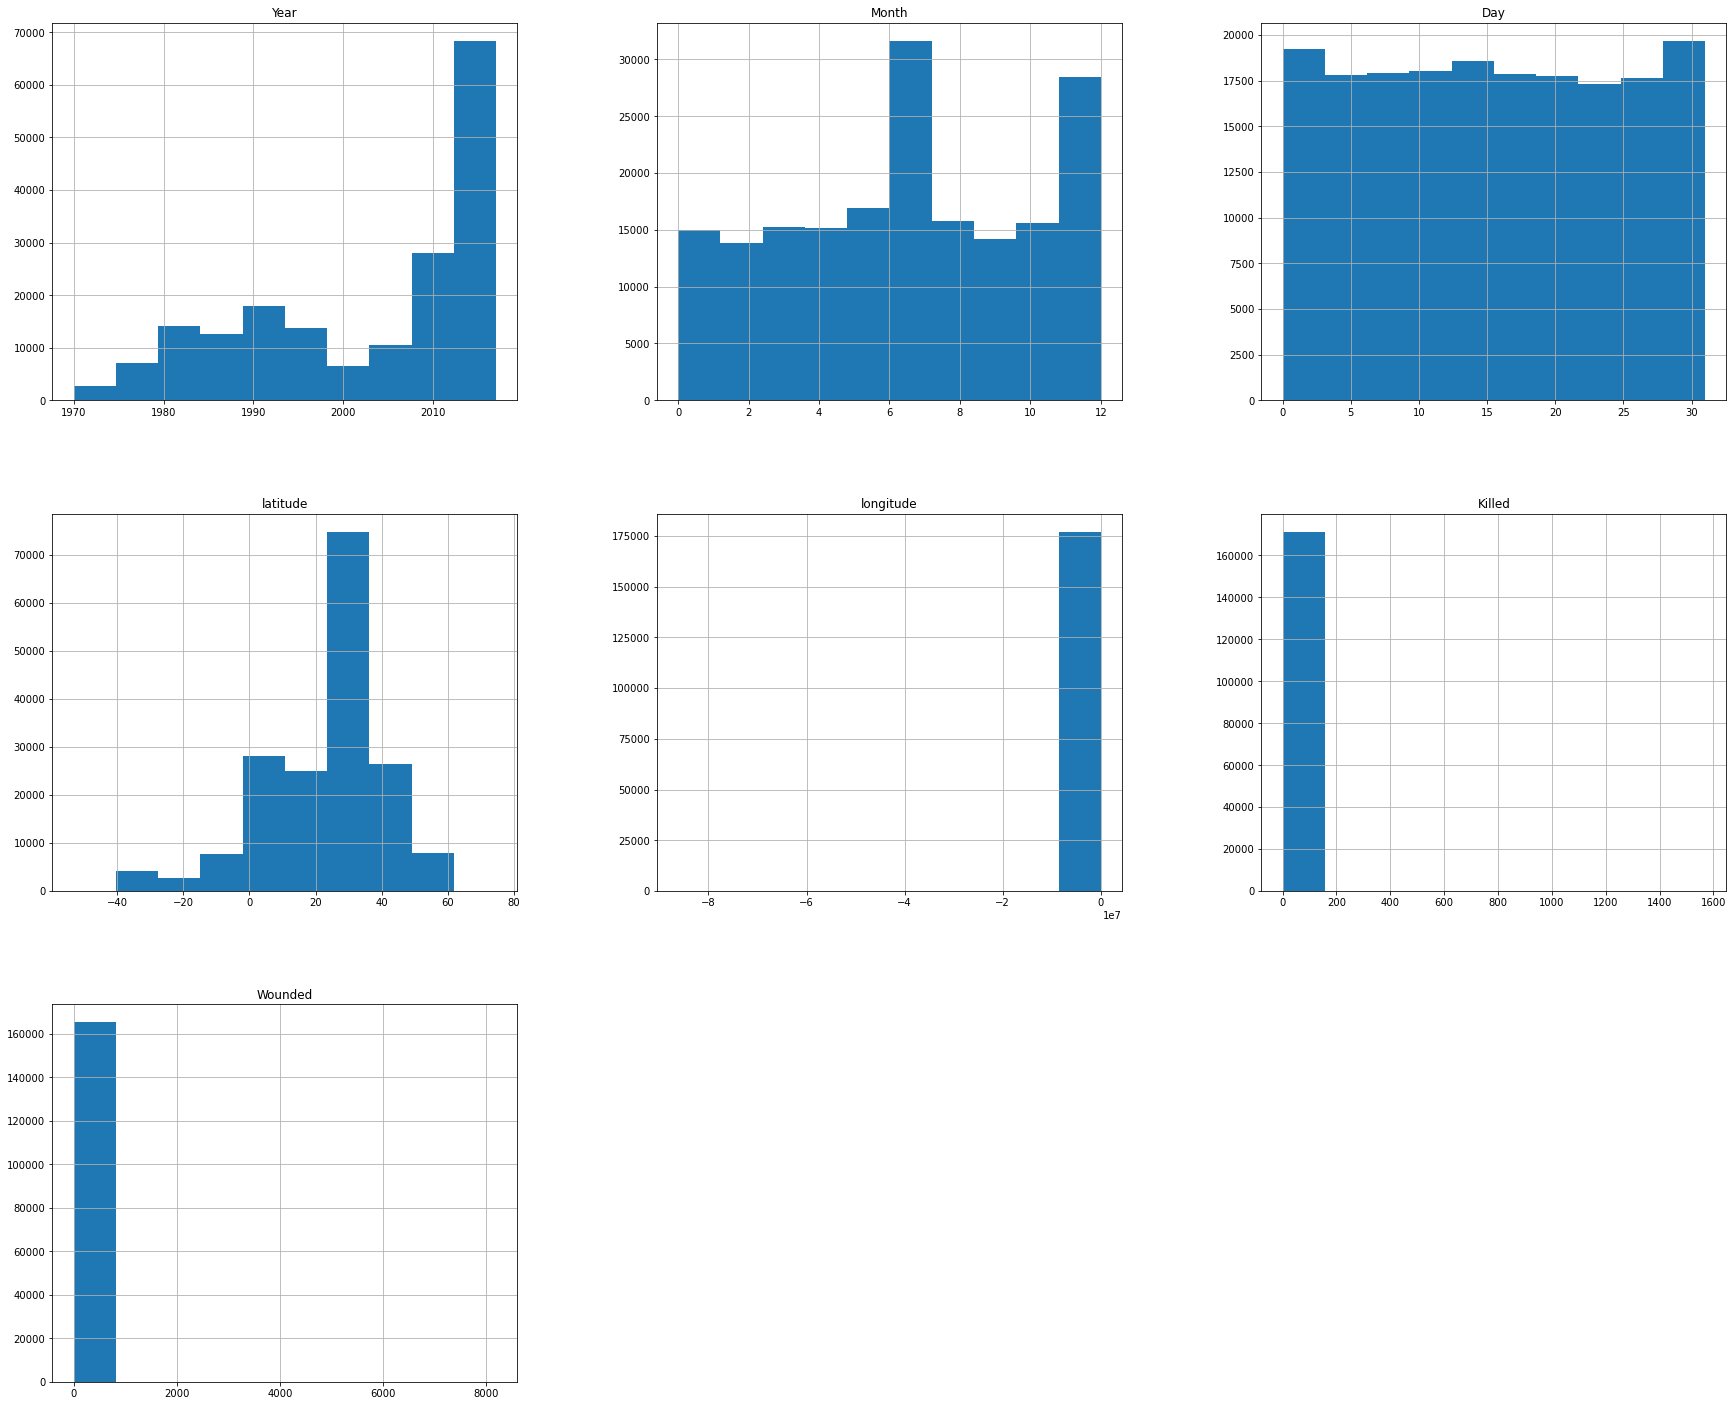

In [201]:
# Plotting the frequency graph
freqgraph.hist(figsize=(30,25))
plt.show()

In [202]:
# Filling the missing values with median based on their frequency distribution
terror['Wounded'] = terror['Wounded'].fillna(terror['Wounded'].median()).astype(int)
terror['Killed'] = terror['Killed'].fillna(terror['Killed'].median()).astype(int)


In [203]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       181691 non-null  int64  
 11  Wounded      181691 non-null  int64  
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(2), int64(5),

# Step 3 - Exploratory Data Analysis


# 3.1. Univariate Analysis

In [204]:
terror['AttackType'].value_counts()


Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64

In [205]:
(terror['AttackType'].value_counts()/terror.shape[0])*100


Bombing/Explosion                      48.574228
Armed Assault                          23.484377
Assassination                          10.629035
Hostage Taking (Kidnapping)             6.141196
Facility/Infrastructure Attack          5.699787
Unknown                                 4.004601
Unarmed Assault                         0.558641
Hostage Taking (Barricade Incident)     0.545432
Hijacking                               0.362704
Name: AttackType, dtype: float64

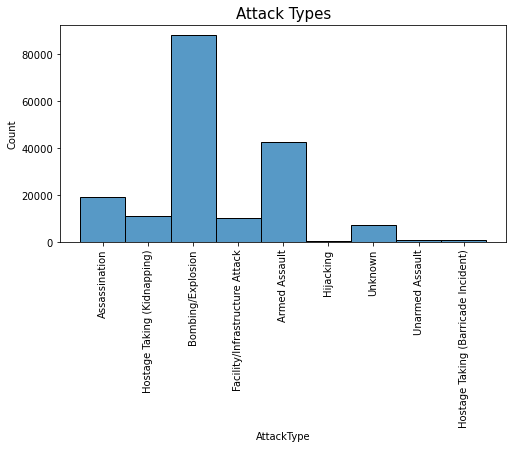

In [215]:
plt.figure(figsize = (8,4))
sns.histplot(terror['AttackType'], palette='magma')
plt.title('Attack Types',fontsize=15)
plt.xticks(rotation=90)
plt.show()

# Observation



1.50% of the Attack happened with Bombing/Explosion


2.10-20% of the Attack happened with Armed Assault and Assassination 

3.Remaining  are in between 0-6%


# Top 10 Countries Affected


In [207]:
terror.Country.value_counts()[:10]


Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

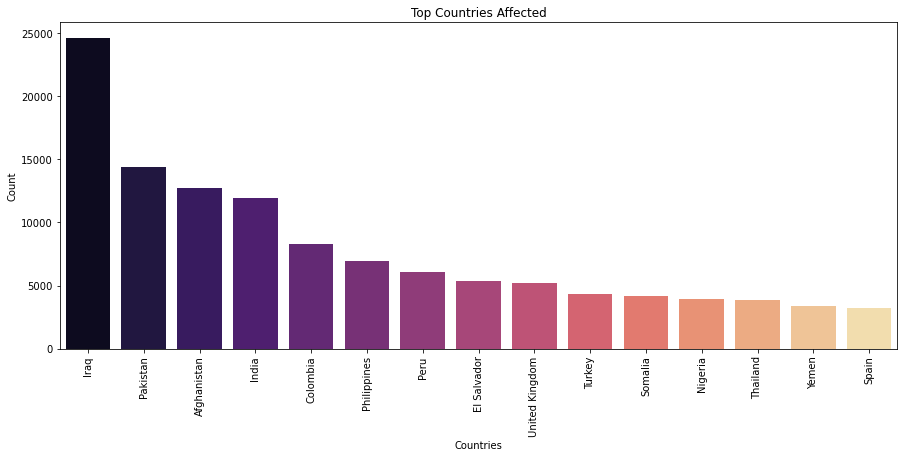

In [214]:
plt.subplots(figsize=(15,6))
sns.barplot(terror['Country'].value_counts()[:15].index,terror['Country'].value_counts()[:15].values,palette='magma')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

# Observations 

1.Iraq is the most affected country by terrorism.



In [210]:
(terror['Target_type'].value_counts().head(10)/terror['Target_type'].shape[0])*100


Private Citizens & Property       23.947801
Military                          15.401974
Police                            13.487735
Government (General)              11.713844
Business                          11.375907
Transportation                     3.742068
Utilities                          3.314969
Unknown                            3.246171
Religious Figures/Institutions     2.443709
Educational Institution            2.378764
Name: Target_type, dtype: float64

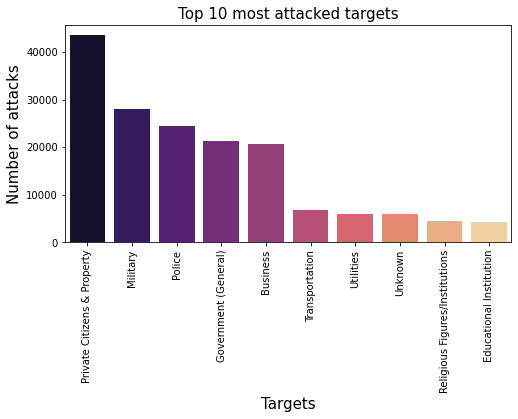

In [211]:
plt.figure(figsize = (8,4))
sns.barplot(x = terror['Target_type'].value_counts().head(10).index, y = terror['Target_type'].value_counts().head(10).values, 
            palette='magma')
plt.title('Top 10 most attacked targets',fontsize=15)
plt.xlabel('Targets',fontsize=15)
plt.ylabel('Number of attacks',fontsize=15)
plt.xticks(rotation=90)
plt.show()


# Observation



1.The most Attacked Target is 'Private Citizens & Property' which is approximately 25%

2.10-20% is the Target which is 'Military','Police', 'Government', 'Business'


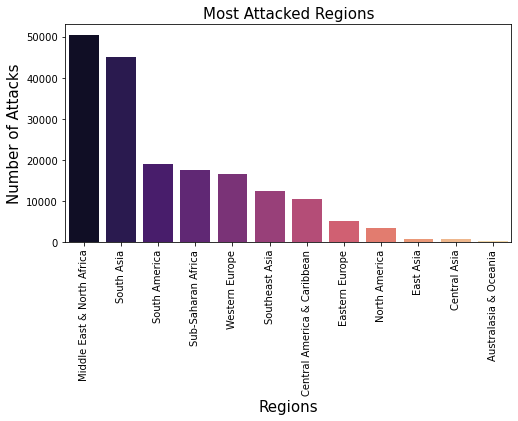

In [217]:
plt.figure(figsize = (8,4))
sns.barplot(x = terror['Region'].value_counts().index, y = terror['Region'].value_counts().values,palette='magma')
plt.title('Most Attacked Regions',fontsize=15)
plt.xlabel('Regions',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.xticks(rotation=90)
plt.show()

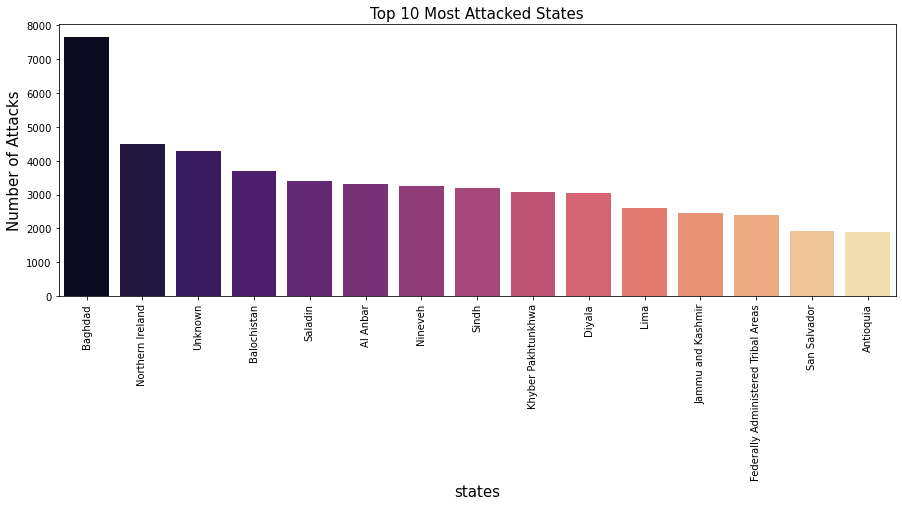

In [221]:
plt.figure(figsize = (8,4))
sns.barplot(x = terror['state'].value_counts().head(15).index, y = terror['state'].value_counts().head(15).values,palette='magma')
plt.title('Top 10 Most Attacked States',fontsize=15)
plt.xlabel('states',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 5)

# Observation



1.Most Attacked Region is 'Middle East and North Africa'.

2.Most Attacked State is 'Baghdad'.

In [223]:
(terror['Weapon_type'].value_counts().head()/terror['Weapon_type'].shape[0])*100


Explosives    50.869883
Firearms      32.210731
Unknown        8.342185
Incendiary     6.128537
Melee          2.011657
Name: Weapon_type, dtype: float64

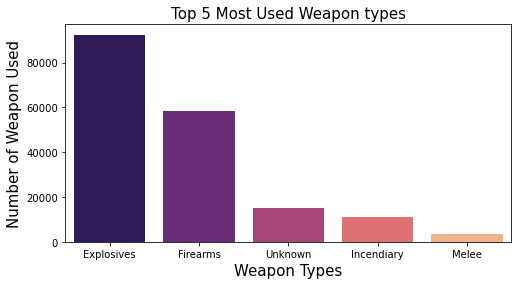

In [224]:
plt.figure(figsize=(8,4))
sns.barplot(x = terror['Weapon_type'].value_counts().head().index,y = terror['Weapon_type'].value_counts().head().values,palette='magma')
plt.title('Top 5 Most Used Weapon types',fontsize=15)
plt.xlabel('Weapon Types',fontsize=15)
plt.ylabel('Number of Weapon Used',fontsize=15)
plt.show()


Apporximately 50% of Weapon used is 'Explosives' whereas 32% 'Firearms' used in the terrorism



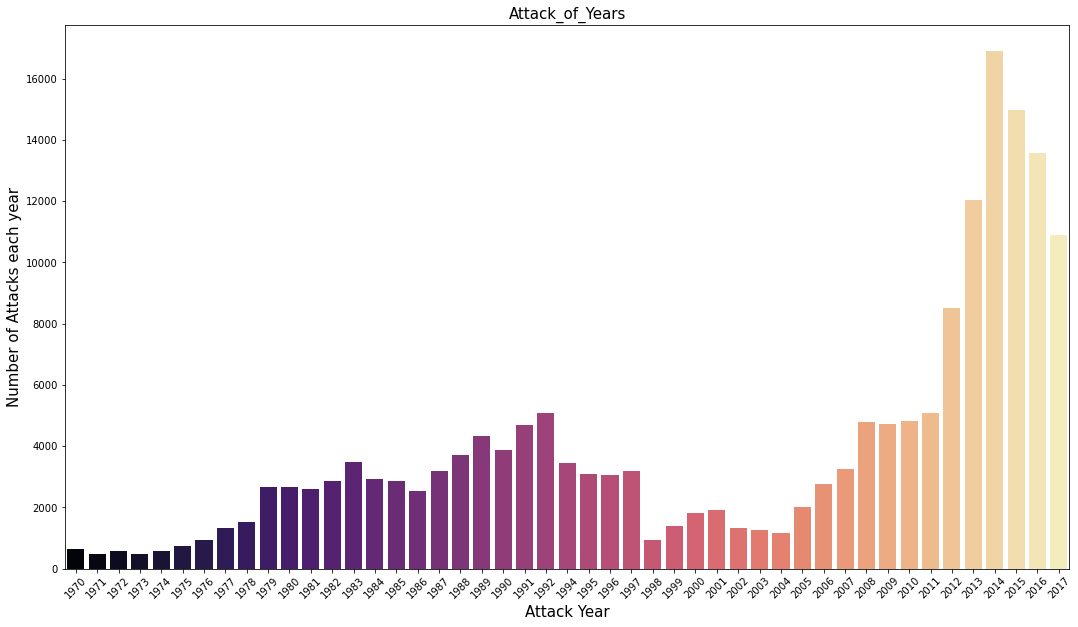

In [225]:
x_year = terror['Year'].unique()
y_count_years = terror['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'magma')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year',fontsize=15)
plt.ylabel('Number of Attacks each year',fontsize=15)
plt.title('Attack_of_Years',fontsize=15)
plt.show()

# Observation



1.2014 appears to be witness of a huge terrorist attacks

2.2014 recorded a large increase in attacks of terrorism.


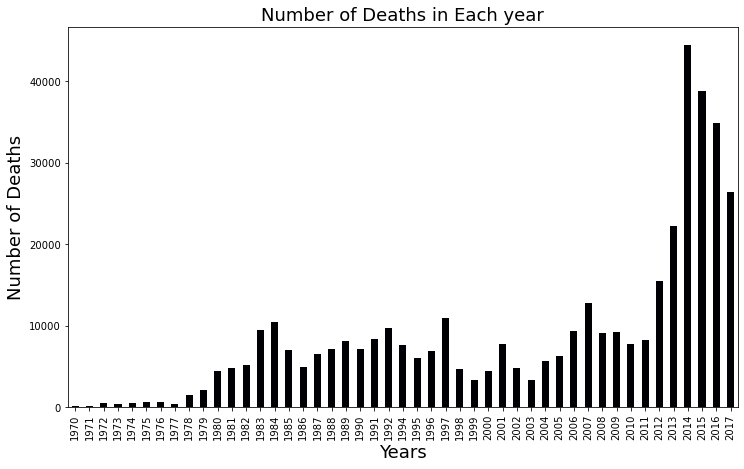

In [227]:
plt.figure(figsize = (12,7))
data.groupby(['Year'])['Killed'].sum().plot(kind='bar',colormap='magma')
plt.title('Number of Deaths in Each year',fontsize=18)
plt.xlabel('Years',fontsize=18)
plt.ylabel('Number of Deaths',fontsize=18)
plt.xticks(rotation=90)
plt.show()

1.Number of deaths caused by terrorism is more between 2014 and 2018

2.with on an average >50K people being killed. 

3.High peak went to 2014 with 45K+ deaths

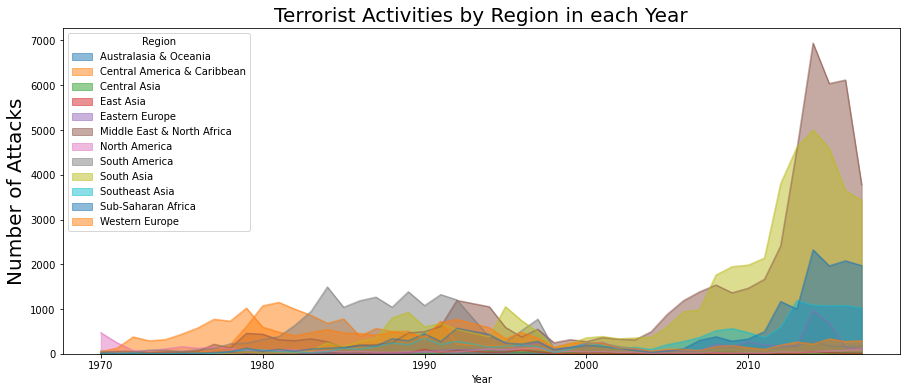

In [234]:
pd.crosstab(terror.Year, terror.Region).plot(kind='area',stacked=False,figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year',fontsize=20)
plt.ylabel('Number of Attacks',fontsize=20)
plt.show()

# 3.2. Bivariate Analysis

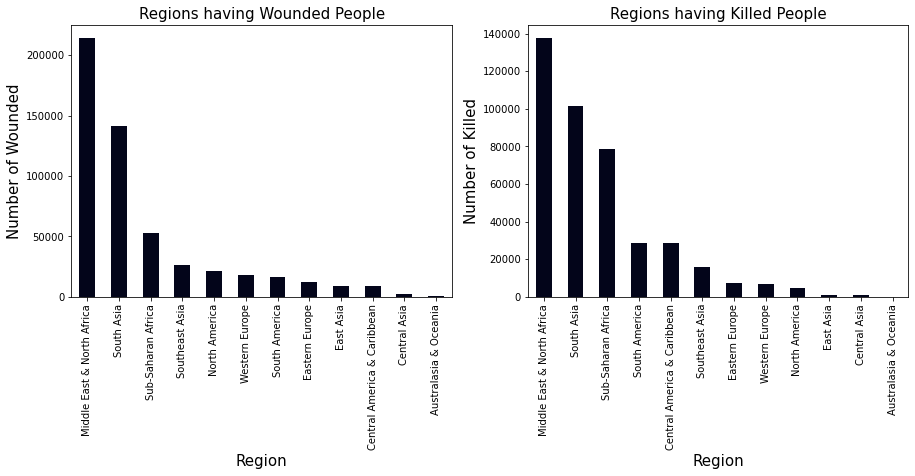

In [230]:
plt.subplot(1,2,1)

data.groupby(['Region'])['Wounded'].sum().sort_values(ascending = False).plot(kind='bar',colormap='rocket')
plt.title('Regions having Wounded People',fontsize=15)
plt.xlabel('Region',fontsize=15)
plt.ylabel('Number of Wounded',fontsize=15)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
data.groupby(['Region'])['Killed'].sum().sort_values(ascending = False).plot(kind='bar',colormap='rocket')
plt.title('Regions having Killed People',fontsize=15)
plt.xlabel('Region',fontsize=15)
plt.ylabel('Number of Killed',fontsize=15)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 5)

'Middle East & North Africa' has the most Killed people (>1.4 Lacs) and wounded people (>2 lacs)


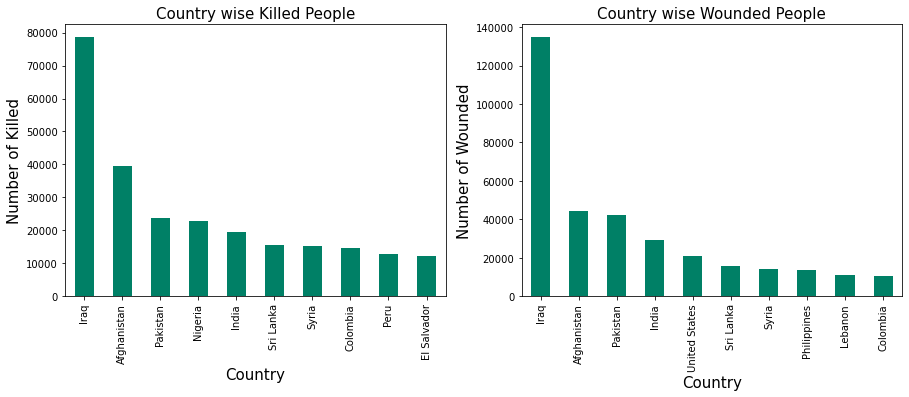

In [233]:

plt.subplot(1,2,2)

df1=data.groupby(['Country'])['Wounded'].sum().sort_values(ascending = False).head(10).plot(kind='bar',colormap='summer')
plt.title('Country wise Wounded People',fontsize=15)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Number of Wounded',fontsize=15)
plt.xticks(rotation=90)

plt.subplot(1,2,1)
data.groupby(['Country'])['Killed'].sum().sort_values(ascending = False).head(10).plot(kind='bar',colormap='summer')
plt.title('Country wise Killed People',fontsize=15)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Number of Killed',fontsize=15)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 5)

'Iraq' has the most Killed people (>70K) and wounded people (>1.2 lacs) Afganistan, pakistan and India all saw peak deaths.



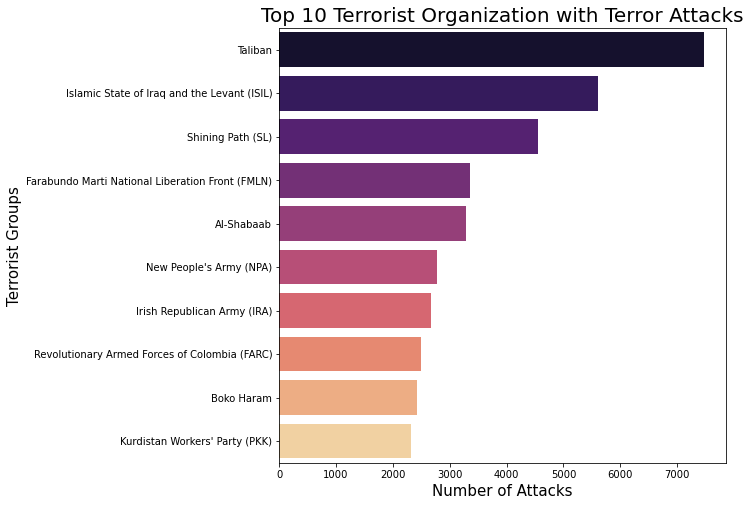

In [235]:
plt.figure(figsize=(8,8))
sns.barplot(x = terror['Group'].value_counts()[1:11].values, y = terror['Group'].value_counts()[1:11].index,palette='magma')
plt.title('Top 10 Terrorist Organization with Terror Attacks',fontsize=20)
plt.xlabel('Number of Attacks',fontsize=15)
plt.ylabel('Terrorist Groups',fontsize=15)
plt.show()


# Creating New Dataframe for Taliban


In [238]:
terror_tal = data[terror.Group == 'Taliban']
terror_tal

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
59040,199504200002,1995,4,20,NaN,1,4/23/1995,4,Afghanistan,6,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
60014,199508030006,1995,8,3,NaN,0,NaN,4,Afghanistan,6,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
60462,199509210008,1995,9,21,NaN,1,9/23/1995,4,Afghanistan,6,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
60786,199510250011,1995,10,25,NaN,0,NaN,4,Afghanistan,6,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
71682,200101070007,2001,1,7,NaN,1,1/10/2001,4,Afghanistan,6,...,Sources provide different accounts of the numb...,"""Taliban recapture central Afghan district,"" A...","""Taleban killed hundreds of Afghans - reports,...","""Afghanistan - Taleban accused of mass killing...",UMD Schmid 2012,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181600,201712280016,2017,12,28,NaN,0,NaN,4,Afghanistan,6,...,NaN,"""Taliban kill 4 border police in Nangarhar amb...","""Highlights: Pakistan Pashto Press 29 December...",NaN,START Primary Collection,0,0,0,0,NaN
181619,201712280039,2017,12,28,2017-12-28 00:00:00,0,NaN,4,Afghanistan,6,...,NaN,"""Program Summary: Ghazni Ghaznawian Television...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181651,201712300008,2017,12,30,NaN,0,NaN,4,Afghanistan,6,...,NaN,"""Media Highlights on Afghanistan 30 December 2...","""Ten Taliban militants killed in clash with Af...",NaN,START Primary Collection,0,0,0,0,NaN
181676,201712310009,2017,12,31,NaN,0,NaN,4,Afghanistan,6,...,The victims included police commander Faqeer A...,"""Commander among 5 ALP members killed in Logar...","""Media Highlights on Afghanistan 1 January 201...",NaN,START Primary Collection,0,0,0,0,NaN


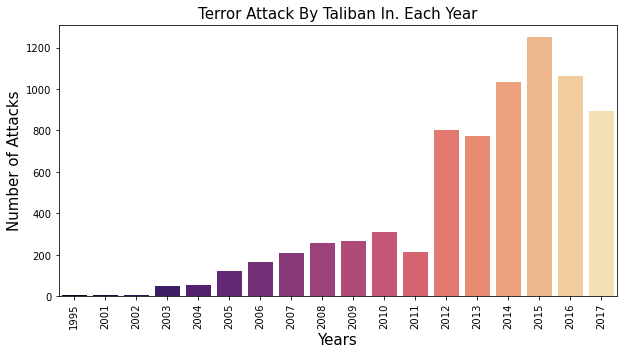

In [240]:

# Terror Attacks by Taliban over the Years
plt.figure(figsize = (10,5))
sns.barplot(x = terror_tal['Year'].value_counts().index,y = data_tal['Year'].value_counts().values, palette = 'magma')
plt.title('Terror Attack By Taliban In. Each Year',fontsize=15)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.xticks(rotation= 90)
plt.show()

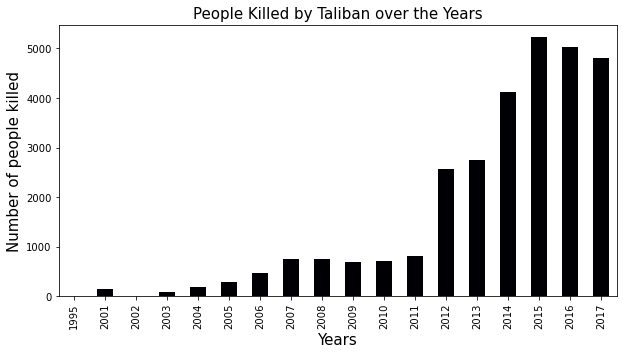

In [242]:
plt.figure(figsize=(10,5))
terror_tal.groupby(['Year'])['Killed'].sum().plot(kind='bar',colormap='magma')
plt.title('People Killed by Taliban over the Years',fontsize=15)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Number of people killed',fontsize=15)
plt.xticks(rotation=90)
plt.show()

Taliban killed more than 5000 people during 2015 after that a decreasing trend could be seen but still the numbers are very high



In [243]:
# creating new dataframe for the year 2014
terror_2014 =data[terror.Year == 2014]
terror_2014

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
125335,201401010001,2014,1,1,NaN,0,NaN,45,Colombia,3,...,NaN,"""ELN bomb Colombia oil pipeline infrastructure...","""Colombia Guerrilla Update: ELN Blows Up Crude...",NaN,START Primary Collection,0,0,0,0,"201401010001, 201401010055, 201401010056, 2014..."
125336,201401010002,2014,1,1,NaN,0,NaN,182,Somalia,11,...,Casualty numbers for this attack represent an ...,"""11 dead, 40 injured in bomb attack in Somalia...","""Somalia twin bombing toll rises to 11: police...","""Somalia: Twin Suicide Attack at Mogadishu Hot...",START Primary Collection,0,0,0,0,"201401010002, 201401010039, 201401010040"
125337,201401010003,2014,1,1,NaN,0,NaN,153,Pakistan,6,...,Casualty numbers for this attack conflict acro...,"""Pakistan car bombing kills Shia pilgrims,"" Al...","""Suicide blast hits pilgrims' bus,"" Dawn (Paki...","""Two dead, 31 injured in bus bombing in Pakist...",START Primary Collection,0,0,0,0,NaN
125338,201401010004,2014,1,1,NaN,0,NaN,153,Pakistan,6,...,NaN,"""Highlights: Pakistan Balochistan Press 2 Janu...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
125339,201401010005,2014,1,1,NaN,1,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Free Kidnapped ...","""SOCAFRICA: Al-Shabaab Incident Tracker, 29 De...",NaN,START Primary Collection,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142236,201412310105,2014,12,31,2014-12-31 00:00:00,0,NaN,6,Algeria,10,...,NaN,"""Algeria Security Daily Digest January 29, 201...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
142237,201412310106,2014,12,31,2014-12-31 00:00:00,1,NaN,93,Indonesia,5,...,NaN,"""Indonesia: Poso terrorist group responsible f...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
143507,201501270001,2014,12,27,NaN,0,NaN,4,Afghanistan,6,...,Casualty numbers for this incident conflict ac...,"""Afghanistan: U.S.-led coalition formally ends...","""Programme summary of Afghan Khost Radio news ...","""Afghan Taliban say six soldiers killed or inj...",START Primary Collection,0,0,0,0,NaN
143727,201501310001,2014,12,31,NaN,0,NaN,160,Philippines,5,...,Casualty numbers for this incident conflict ac...,"""Authorities blame BIFF in North Cotabato dead...","""Bomb blast in North Cotabato town kills 2,"" A...","""4 die, 30 hurt in North Cotabato bombing,"" Ph...",START Primary Collection,0,0,0,0,NaN


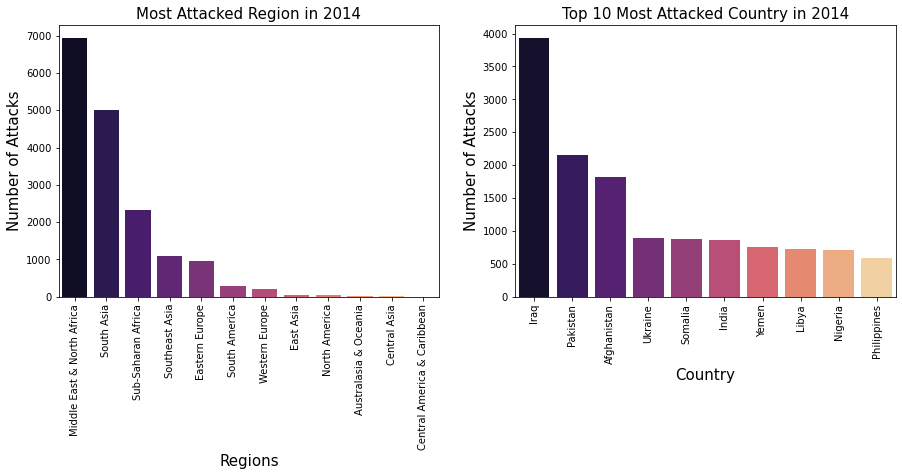

In [244]:
# Regions that were attacked most in 2014
plt.subplot(1,2,1)
sns.barplot(x = terror_2014['Region'].value_counts().index,y = terror_2014['Region'].value_counts().values,palette='magma')
plt.title('Most Attacked Region in 2014',fontsize=15)
plt.xlabel('Regions',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.xticks(rotation=90)

# top 10 countries that were attacked most in 2014
plt.subplot(1,2,2)
sns.barplot(x = terror_2014['Country'].value_counts().head(10).index,y = terror_2014['Country'].value_counts().head(10).values,palette='magma')
plt.title('Top 10 Most Attacked Country in 2014',fontsize=15)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 5)

# Observation



1.In 2014, Most Attacked Region 'Middle East and North Africa' then comes South Asia

2.In 2014, Most Attacked Country is 'Iraq'

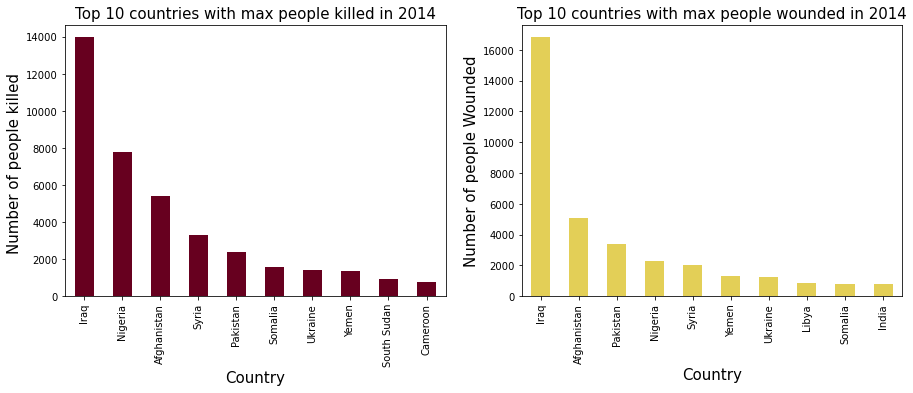

In [247]:
plt.subplot(1,2,1)
terror_2014.groupby(['Country'])['Killed'].sum().sort_values(ascending = False).head(10).plot(kind='bar',colormap='RdBu')
plt.title('Top 10 countries with max people killed in 2014',fontsize=15)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Number of people killed ',fontsize=15)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
terror_2014.groupby(['Country'])['Wounded'].sum().sort_values(ascending = False).head(10).plot(kind='bar',color='#E3CF57')
plt.title('Top 10 countries with max people wounded in 2014',fontsize=15)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Number of people Wounded',fontsize=15)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 5)


# Conclusion

After Analysising Data through Exploratory Data Analysis we got the following insights.They are as follows



1.Almost 50% of attacks happened through with Bombing/Explosion

2.Iraq is the most affected country by terrorism

3.The most Attacked Target is 'Private Citizens & Property' which is approximately 25%

4.Most Attacked Region is 'Middle East and North Africa' then comes South Asia

5.Most Attacked State is 'Baghdad'

6.2014 appears to be witness of a huge terrorist attacks

7.Number of deaths caused by terrorism is more between 2014 and 2018, with on an average >50K people being killed, High peak went to 2014 with 45K+ deaths

8.Taliban became more active since 2012 and they are responsible for the most of the terror attacks


9.Taliban killed more than 5000 people during 2015 after that a decreasing trend could be seen but still the numbers are very high






# Recommendations 

1.Security and Strict border policy should be implemented to prevent the movement of explosives between the regions.

2.High security should be implemented at the Middle East and North Africa and other regions such as South Asia,South America etc

3.Security for Private Citizens and Property is very important

4.Support and cooperate with law enforcement agencies, intelligence services, and other relevant authorities. Provide them with any information or tips regarding potential threats or suspicious activities.

5.Awareness of these types of Attacks among people is also one of the important aspects.
